In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data = pd.read_csv('drive/My Drive/dataset/DATASET-AWOS-BALANCE-ABJAD.csv',delimiter=';')
data.head()

,date (yyyy-MM-dd HH:mm:ss),windAlg.Spd_2m_kt,windAlg.Dir_2m,windAlg.SpdX_2m_kt,ALgt_1m_cd/m2,windAlg.Spd_10m_kt,windAlg.Dir_10m,windAlg.DirCCw_10m,windAlg.DirCw_10m,windAlg.Peak_10m_kt,zenoAlg.AT_5m_C,zenoAlg.DP_5m_C,zenoAlg.RH_5m,baroAlg.QNH_1m_mb,baroAlg.QFE_1m_mb,baroAlg.BPLow_1m_mb,visiAlg.F_Vis_1m_m,visiAlg.F_Vis_10m_m,visiAlg.VisMn_10m_m,visiAlg.VisMx_10m_m,ceilAlg.Base_30s_ft,ceilAlg.layer_report,ALgt_1m_cd/m2_5
0,19/02/2021 01:32,10.9,264,3.0,5626.0,11.1,273,246.0,295.0,15.3,27.5,27.5,100.0,1010.8,1010.6,1010.6,20000.0,9999.0,20000.0,20000.0,1672.0,BKN,5626.0
1,19/02/2021 01:33,11.2,273,1.4,5779.0,10.9,273,246.0,292.0,14.5,27.6,27.6,100.0,1010.8,1010.6,1010.6,20000.0,9999.0,20000.0,20000.0,1721.0,BKN,5779.0
2,19/02/2021 01:34,12.1,276,0.8,5744.0,10.9,271,246.0,290.0,14.5,27.6,27.6,100.0,1011.2,1010.7,1010.6,20000.0,9999.0,20000.0,20000.0,1835.0,BKN,5744.0
3,19/02/2021 01:35,12.1,264,3.3,5461.0,11.0,269,246.0,290.0,14.6,27.6,27.6,100.0,1011.2,1010.7,1010.6,20000.0,9999.0,20000.0,20000.0,0.0,BKN,5461.0
4,19/02/2021 01:36,12.1,261,3.9,5449.0,11.2,267,246.0,290.0,14.6,27.5,27.5,100.0,1011.2,1010.7,1010.7,20000.0,9999.0,20000.0,20000.0,0.0,BKN,5449.0


In [3]:
cuaca = data[['zenoAlg.DP_5m_C','zenoAlg.AT_5m_C','baroAlg.QFE_1m_mb','visiAlg.F_Vis_1m_m','windAlg.Spd_10m_kt','ceilAlg.layer_report','windAlg.Dir_10m','baroAlg.QNH_1m_mb','ALgt_1m_cd/m2_5','ALgt_1m_cd/m2']]
cuaca.head()

,zenoAlg.DP_5m_C,zenoAlg.AT_5m_C,baroAlg.QFE_1m_mb,visiAlg.F_Vis_1m_m,windAlg.Spd_10m_kt,ceilAlg.layer_report,windAlg.Dir_10m,baroAlg.QNH_1m_mb,ALgt_1m_cd/m2_5,ALgt_1m_cd/m2
0,27.5,27.5,1010.6,20000.0,11.1,BKN,273,1010.8,5626.0,5626.0
1,27.6,27.6,1010.6,20000.0,10.9,BKN,273,1010.8,5779.0,5779.0
2,27.6,27.6,1010.7,20000.0,10.9,BKN,271,1011.2,5744.0,5744.0
3,27.6,27.6,1010.7,20000.0,11.0,BKN,269,1011.2,5461.0,5461.0
4,27.5,27.5,1010.7,20000.0,11.2,BKN,267,1011.2,5449.0,5449.0


In [4]:
cuaca.fillna(cuaca.median(),inplace=True)
cuaca.dropna(how='any',axis=0,inplace=True) 
cuaca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27702 entries, 0 to 27701
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zenoAlg.DP_5m_C       27702 non-null  float64
 1   zenoAlg.AT_5m_C       27702 non-null  float64
 2   baroAlg.QFE_1m_mb     27702 non-null  float64
 3   visiAlg.F_Vis_1m_m    27702 non-null  float64
 4   windAlg.Spd_10m_kt    27702 non-null  float64
 5   ceilAlg.layer_report  27702 non-null  object 
 6   windAlg.Dir_10m       27702 non-null  int64  
 7   baroAlg.QNH_1m_mb     27702 non-null  float64
 8   ALgt_1m_cd/m2_5       27702 non-null  float64
 9   ALgt_1m_cd/m2         27702 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 2.3+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
X = cuaca[['zenoAlg.DP_5m_C','zenoAlg.AT_5m_C','baroAlg.QFE_1m_mb','visiAlg.F_Vis_1m_m','windAlg.Spd_10m_kt','windAlg.Dir_10m']]
y = cuaca[['ceilAlg.layer_report']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


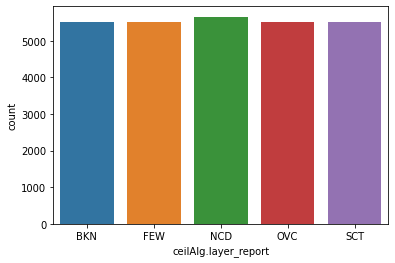

In [6]:
 import seaborn as sns
#Univariate analysis target.
sns.countplot(cuaca['ceilAlg.layer_report'])

In [7]:
X = X.values 
y = y.values

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>1, train: 1.000, test: 0.931, acc: 0.931


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>2, train: 1.000, test: 0.931, acc: 0.931


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>3, train: 1.000, test: 0.926, acc: 0.926


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>4, train: 1.000, test: 0.926, acc: 0.926


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>5, train: 1.000, test: 0.923, acc: 0.923


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>6, train: 1.000, test: 0.921, acc: 0.921


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>7, train: 1.000, test: 0.918, acc: 0.917


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>8, train: 1.000, test: 0.916, acc: 0.916


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>9, train: 1.000, test: 0.915, acc: 0.915


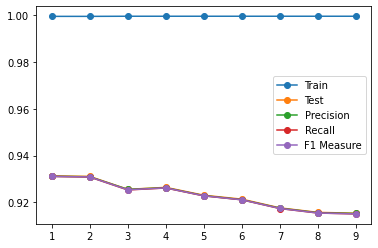

In [11]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

# define lists to collect scores
train_scores, test_scores, precision_scores, recall_scores, f1_scores = list(), list(), list(), list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 10)]
# evaluate a decision tree for each depth

for i in values:
  # configure the model
  model = KNeighborsClassifier(n_neighbors=i, p=1, weights='distance', leaf_size=1)
	# fit model on the training dataset
  model.fit(x_train, y_train)
	# evaluate on the train dataset
  train_yhat = model.predict(x_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)
  # evaluate on the test dataset
  test_yhat = model.predict(x_test)
  test_acc = accuracy_score(y_test, test_yhat)
  precision=precision_score(y_test,test_yhat,average='macro')
  recall = recall_score(y_test, test_yhat, average='macro')
  f1 = f1_score(y_test, test_yhat, average='macro')
  test_scores.append(test_acc)
  precision_scores.append(precision)
  recall_scores.append(recall)
  f1_scores.append(f1)

	# summarize progress
  print('>%d, train: %.3f, test: %.3f, acc: %.3f' % (i, train_acc, test_acc, precision))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.plot(values, precision_scores, '-o', label='Precision')
pyplot.plot(values, recall_scores, '-o', label='Recall')
pyplot.plot(values, f1_scores, '-o', label='F1 Measure')
pyplot.legend()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>1, train: 1.000, test: 0.926, acc: 0.926


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>2, train: 1.000, test: 0.926, acc: 0.925


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>3, train: 1.000, test: 0.916, acc: 0.916


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>4, train: 1.000, test: 0.916, acc: 0.915


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>5, train: 1.000, test: 0.910, acc: 0.910


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>6, train: 1.000, test: 0.908, acc: 0.907


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>7, train: 1.000, test: 0.906, acc: 0.906


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>8, train: 1.000, test: 0.903, acc: 0.903


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


>9, train: 1.000, test: 0.900, acc: 0.900


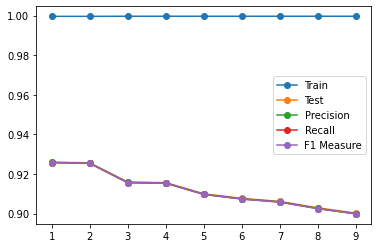

In [13]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

# define lists to collect scores
train_scores, test_scores, precision_scores, recall_scores, f1_scores = list(), list(), list(), list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 10)]
# evaluate a decision tree for each depth

for i in values:
  # configure the model
  model = KNeighborsClassifier(n_neighbors=i, p=2, weights='distance', leaf_size=1)
	# fit model on the training dataset
  model.fit(x_train, y_train)
	# evaluate on the train dataset
  train_yhat = model.predict(x_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)
  # evaluate on the test dataset
  test_yhat = model.predict(x_test)
  test_acc = accuracy_score(y_test, test_yhat)
  precision=precision_score(y_test,test_yhat,average='macro')
  recall = recall_score(y_test, test_yhat, average='macro')
  f1 = f1_score(y_test, test_yhat, average='macro')
  test_scores.append(test_acc)
  precision_scores.append(precision)
  recall_scores.append(recall)
  f1_scores.append(f1)

	# summarize progress
  print('>%d, train: %.3f, test: %.3f, acc: %.3f' % (i, train_acc, test_acc, precision))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.plot(values, precision_scores, '-o', label='Precision')
pyplot.plot(values, recall_scores, '-o', label='Recall')
pyplot.plot(values, f1_scores, '-o', label='F1 Measure')
pyplot.legend()
pyplot.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, p=1, weights='distance', leaf_size=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9255203946576825

DT 0.8975099242150848
KNN 0.9339588596174666


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


DT 0.890994405341996
KNN 0.9332250496300307


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


DT 0.8807604379737697


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNN 0.9255203946576825
DT 0.8687844057395542


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNN 0.9229311433986103


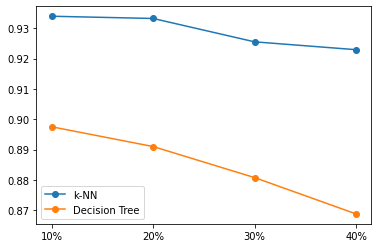

In [15]:
#PERBANDINGAN DENGAN DECISION TREE CLASSIFIER
from sklearn import tree
clf = tree.DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors = 3, p=1, weights='distance', leaf_size=1)
dt_scores, knn_scores = list(), list()
values = [str(i)+'%' for i in range(10, 50, 10)]

for i in range(10,50,10):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.01*i, random_state=42, stratify=y)
  x_train = scaler.transform(x_train)
  x_test = scaler.transform(x_test)

  clf = clf.fit(x_train, y_train)
  clf_score = clf.score(x_test,y_test)
  dt_scores.append(clf_score)
  print("DT",clf_score)

  knn.fit(x_train, y_train)
  knn_score = knn.score(x_test,y_test)
  print("KNN", knn_score)
  knn_scores.append(knn_score)

pyplot.plot(values, knn_scores, '-o', label='k-NN')
pyplot.plot(values, dt_scores, '-o', label='Decision Tree')
pyplot.legend()
pyplot.show()